<a href="https://colab.research.google.com/github/Accenture-1a-BTT/accenture-1a-team-project/blob/test-koshish/Copy_of_FakeNews_Accenture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
%matplotlib inline
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

import spacy
from collections import Counter
import nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 15.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Exploratory Data Analysis Data Cleaning

## Single Dataset Inspection and Cleaning

Load Data Sets and Save it as a Pandas DataFrame

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
folder_path = '/content/drive/My Drive/Break Through Tech/AI Studio/Google Colab/Data Set/'
true_file = os.path.join(folder_path, 'True.csv')
fake_file = os.path.join(folder_path, 'Fake.csv')
true_df = pd.read_csv(true_file,header=0)
fake_df = pd.read_csv(fake_file,header=0)

Basic Inspection

In [34]:
# Check the data set size
print("True news data set size: ", true_df.size)
print("Fake news data set size: ", fake_df.size)

True news data set size:  85668
Fake news data set size:  93924


In [35]:
# Check Columns of Data Set
print("Columns of true news data set: ", list(true_df.columns))
print("Columns of fake news data set: ", list(fake_df.columns))

Columns of true news data set:  ['title', 'text', 'subject', 'date']
Columns of fake news data set:  ['title', 'text', 'subject', 'date']


In [36]:
# Check Data Types
print("Data types of true news data set: ")
print(true_df.dtypes)
print("Data types of fake news data set: ")
print(fake_df.dtypes)

Data types of true news data set: 
title      object
text       object
subject    object
date       object
dtype: object
Data types of fake news data set: 
title      object
text       object
subject    object
date       object
dtype: object


In [37]:
print("First 10 rows of True News DataFrame: ")
true_df.head(10)

First 10 rows of True News DataFrame: 


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [38]:
print("First 10 rows of Fake News DataFrame: ")
fake_df.head(10)

First 10 rows of Fake News DataFrame: 


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


Check missing values in each dataset

In [39]:
print("Null value on each data set: ")
print("True news file:\n", true_df.isnull().sum())
print("Fake news file:\n", fake_df.isnull().sum())
# Siying Comment:
# We know from the inspection that there is no null value on the data set so we don't need to worry about the null value.

print("\nEmpty strings check:")
print("True news empty text:", (true_df['text'].str.strip() == '').sum())
print("Fake news empty text:", (fake_df['text'].str.strip() == '').sum())
# Siying Comment:
# However, there is no null value in the dataset does not means there is no empty string on the data set.
# And here we did find some rows with empty string in the 'text' feature.
# My suggestion is we can simply delete the rows with empty string since it will not provide any useful information for the model.

print("\nVery short text:")
print("True news < 10 chars:", (true_df['text'].str.len() < 10).sum())
print("Fake news < 10 chars:", (fake_df['text'].str.len() < 10).sum())
# Siying Comment:
# Also, I found some data set with very short string length, I'm quite worried about if it will provide us sufficient information to train the model.
# Since Chinyere will be focus on punctuation and sentence length, I think I will leave this question to her that how should we handle this, keep them or drop them.
# # For now, I will remove texts with less than 10 characters since they cannot provide meaningful features for us

# Siying Summary:
# Fake news dataset has 630 empty strings and 651 very short texts. These numbers are very close, which indicates that the most of short texts are actually empty strings.
# Also, notice the disparity in terms of empty strings and short texts:
# - True news: 1 empty string, 1 very short text
#             (can indicates that the very short text is the empty string, which means that true news does not has short text problems)
# - Fake news: 630 empty string, 651 very short text, which means 21 very short texts
# It indicates an important differences between real and fake news sources, which could be a distinguishing feature that we can pay attention to.

Null value on each data set: 
True news file:
 title      0
text       0
subject    0
date       0
dtype: int64
Fake news file:
 title      0
text       0
subject    0
date       0
dtype: int64

Empty strings check:
True news empty text: 1
Fake news empty text: 630

Very short text:
True news < 10 chars: 1
Fake news < 10 chars: 651


Remove empty string and very short text from each dataset

In [40]:
# Remove empty string and very short text from true news data set
true_nonempty_df = true_df[(true_df['text'].str.strip() != '') & (true_df['text'].str.len() >= 10)].copy()
# Remove empty string and very short text from fake news data set
fake_nonempty_df = fake_df[(fake_df['text'].str.strip() != '') & (fake_df['text'].str.len() >= 10)].copy()

print("After removing empty string and very short text")
print(f"Ture news size: {len(true_nonempty_df)}(removed {len(true_df) - len(true_nonempty_df)} rows)")
print(f"Fake news size: {len(fake_nonempty_df)}(removed {len(fake_df) - len(fake_nonempty_df)} rows)")

After removing empty string and very short text
Ture news size: 21416(removed 1 rows)
Fake news size: 22830(removed 651 rows)


Check for completely duplicate rows in each dataset

In [41]:
# Check for completely duplicate articles (which means includes title, text, subject, and date)
print("True Dataframe -- Number of duplicate rows:")
print(true_nonempty_df.duplicated().sum())
print("Fake Dataframe -- Number of duplicate rows:")
print(fake_nonempty_df.duplicated().sum())

# Siying Comment:
# Found 206 duplicate rows in real news and 3 in fake news datasets. These are completely identical articles (same title, text, subject, and date).
# Duplicate rows can lead to:
# 1. overfitting,
# 2. give undue weight to our model
# 3. bias on our feature analysis
# 4. more conputational cost
# Thus, I suggest that we should remove the duplicate rows to ensure our data is clean and unbiasd.

True Dataframe -- Number of duplicate rows:
206
Fake Dataframe -- Number of duplicate rows:
3


Remove completely duplicate rows from each dataset

In [42]:
# Remove completely duplicate articles
true_no_duplicates_df = true_nonempty_df.drop_duplicates().copy()
print(f"Remove {len(true_nonempty_df) - len(true_no_duplicates_df)} dulplicate rows")
fake_no_duplicates_df = fake_nonempty_df.drop_duplicates().copy()
print(f"Remove {len(fake_nonempty_df) - len(fake_no_duplicates_df)} dulplicate rows")

Remove 206 dulplicate rows
Remove 3 dulplicate rows


## Merge and cross-check

Add labels to each cleaned dataset

In [43]:
# Add labels before merging
true_no_duplicates_df['label'] = 'TRUE'
fake_no_duplicates_df['label'] = 'FAKE'

Merge datasets into combined dataframe

In [44]:
# Merge the cleaned data sets
merged_df = pd.concat([true_no_duplicates_df, fake_no_duplicates_df], ignore_index=True)

Merged Data Set Inspection

In [45]:
# Check Merged Data Sets
print("Combined dataset shape:", merged_df.shape)
print("Label counts:")
print(merged_df['label'].value_counts())

print("\nMerge Data Set Preview: ")
merged_df.head(10)

Combined dataset shape: (44037, 5)
Label counts:
label
FAKE    22827
TRUE    21210
Name: count, dtype: int64

Merge Data Set Preview: 


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",TRUE
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",TRUE
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",TRUE


Check for conflicting labels (same text, different labels)

In [46]:
# Check if same text has conflict labels
# Groups all rows that have identical text content together, for each group, look at the 'label' column, count how many unique labels exist in each group
text_label_counts = merged_df.groupby('text')['label'].nunique()
# Only look at the groups that has more than 1 label
conflicting_texts = text_label_counts[text_label_counts > 1]

# If any conflict label found:
if len(conflicting_texts) > 0:
  for i, text in enumerate(conflicting_texts.index):
    print(f"\n--- CONFLICT {i+1} ---")
    conflicting_rows = merged_df[merged_df['text'] == text]

    print("Label counts for this article: ")
    print(conflicting_rows['label'].value_counts())

    print(f"Text: {text}")
else:
  print("No conflict labels found!")

# Siying Comment:
# Found no conflicting labels, which means there are no articles with the same text but got different label. It's nice that we don't need to worry about it.

No conflict labels found!


Check for duplicate text content (same text)

In [47]:
print("Number of articles with duplicate text content in data frame:")
print(merged_df['text'].duplicated().sum())

# Siying Comment:
# Found 5402 duplicated text on the data frame.
# These are identical text but with different title, text, subject, and date. They might be the articles that reposted by other media.
# Since keep these duplicated text might also cause bias and overfitting, Thus, I suggest remove these rows with duplicated text as well.

Number of articles with duplicate text content in data frame:
5402


Remove duplicate text content

In [48]:
#THE FINAL DF IS CALLED merged_no_duplicates
merged_no_duplicates_df = merged_df.drop_duplicates(subset=['text'], keep='first').copy()
print(f"Remove {len(merged_df) - len(merged_no_duplicates_df)} dulplicate rows")
print("Clean data overview: ")
print(f"Total articles: {len(merged_no_duplicates_df)}")

Remove 5402 dulplicate rows
Clean data overview: 
Total articles: 38635



**Check for Reuters Tag and Location Header in the Data Set.**




In [49]:

# Add a boolean column for if 'Reuters' appears in the text (case-insensitive)
merged_no_duplicates_df['contains_reuters'] = merged_no_duplicates_df['text'].str.contains('reuters', case=False, na=False)

# Count and percentage by label
print("Number of articles containing 'Reuters':")
print(merged_no_duplicates_df.groupby('label')['contains_reuters'].sum())

print("\nPercentage with 'Reuters' in each label:")
print(merged_no_duplicates_df.groupby('label')['contains_reuters'].mean())

print("\nSample TRUE news with 'Reuters':")
print(merged_no_duplicates_df[(merged_no_duplicates_df['label'] == 'TRUE') & (merged_no_duplicates_df['contains_reuters'])].head(3)['text'].values)


Number of articles containing 'Reuters':
label
FAKE      220
TRUE    21154
Name: contains_reuters, dtype: int64

Percentage with 'Reuters' in each label:
label
FAKE    0.012612
TRUE    0.998254
Name: contains_reuters, dtype: float64

Sample TRUE news with 'Reuters':
['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in wh

Nearly all of our TRUE news articles (99.8)% contain the word "Reuters" and 1.3% of Fake articles do. In other words, we could easily cheat just by picking anything with word "Reuters" as True News which makes it unfair and the
model is not really detecting the fake news but instead looking at the source. Thus, we have decided to remove the Reuters word tag.

In [50]:
merged_no_duplicates_df['text'] = merged_no_duplicates_df['text'].str.replace('reuters', '', case=False, regex=True)
merged_no_duplicates_df['text'] = merged_no_duplicates_df['text'].str.replace(r'\(\s*\)', '', regex=True)

merged_no_duplicates_df['contains_reuters'] = merged_no_duplicates_df['text'].str.contains('reuters', case=False, na=False)
print("Articles with 'Reuters' after removal:")
print(merged_no_duplicates_df['contains_reuters'].sum())

Articles with 'Reuters' after removal:
0


We are deliberately choosing to remove the 'Reuters' tag directly from the text data without creating a separate column. This decision is based on the principles of building simple but reliable machine learning pipeline.



* The single greatest risk of creating a separate is_reuters_source column is that it might accidentally be included as a feature during model training. A model trained with this feature would learn to simply check the source instead of analyzing the text, making it useless on real-world data. The safest way to prevent this mistake is to ensure the feature never exists in the cleaned dataset in the first place.

*   The purpose of identifying the Reuters tag was for Exploratory Data Analysis (EDA). We have already completed that analysis, and it successfully proved that the tag is a source of bias (99.8% of true news has it). Now that its analytical purpose is served, the tag (and any feature derived from it) should be completely removed to prevent it from influencing the model. There is no further value in keeping it.

Our primary goal is to train a model that can distinguish fake from real news based on linguistic patterns, not data artifacts. Keeping the source tag in any form distracts from this goal and encourages focusing on a feature that we know is a "cheat code." Removing it completely forces the model and the team to focus on meaningful features like sentiment, syntax, and entity recognition.


In [51]:
# Sample TRUE news after removing 'Reuters'
print("Sample TRUE news after 'Reuters' removal:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'TRUE']['text'].head(10).values)

# Sample FAKE news
print("\nSample FAKE news:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'FAKE']['text'].head(10).values)

Sample TRUE news after 'Reuters' removal:
['WASHINGTON  - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spendi

Checking for Location Headers in the Data Set

In [52]:

nlp = spacy.load("en_core_web_md")

def has_dateline_spacy(text: str) -> bool:
    if pd.isnull(text):
        return False

    match = re.match(r'^(.{3,100}?)\s*-\s+', text)

    if match:
        header_candidate = match.group(1).strip()
        doc = nlp(header_candidate.title())
        if any(ent.label_ in ["GPE", "LOC", "ORG", "FAC"] for ent in doc.ents):
            return True
    return False

merged_no_duplicates_df['has_location_header'] = merged_no_duplicates_df['text'].apply(has_dateline_spacy)

print("\nProportion of articles starting with a location header (Accurate Count):")
print(merged_no_duplicates_df.groupby('label')['has_location_header'].mean())

print("\nTotal count of articles starting with a location header (Accurate Count):")
print(merged_no_duplicates_df.groupby('label')['has_location_header'].sum())


Proportion of articles starting with a location header (Accurate Count):
label
FAKE    0.000172
TRUE    0.898778
Name: has_location_header, dtype: float64

Total count of articles starting with a location header (Accurate Count):
label
FAKE        3
TRUE    19046
Name: has_location_header, dtype: int64


Again, we have seen that the location header also creates a shortcut to identify the TRUE News as we see from the percentage that Fake news do not contain any location header. If we feed this information our model will rely on this particular location format than to genuinely learn how to detect the fake news. So we have decided to strip the location header.

In [53]:
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    print("\nModel not found.")

def remove_dateline_robust(text: str):

    match = re.match(r'^(.{3,100}?)\s*-\s+', text)

    if match:
        # If a pattern is found, extract the header text.
        header_candidate = match.group(1).strip()

        # Process the candidate with spaCy.
        doc = nlp(header_candidate.title())
        if any(ent.label_ in ["GPE", "LOC", "ORG", "FAC"] for ent in doc.ents):
            return text[match.end():], header_candidate

    return text, None


results_robust = merged_no_duplicates_df['text'].apply(remove_dateline_robust)
merged_no_duplicates_df['text_cleaned'] = results_robust.apply(lambda x: x[0])
merged_no_duplicates_df['header_removed'] = results_robust.apply(lambda x: x[1])

print("Processing complete.")

num_removed_total = merged_no_duplicates_df['header_removed'].notna().sum()
print(f"\nTotal headers removed with the new method: {num_removed_total}")

remaining_mask = merged_no_duplicates_df['text_cleaned'].str.match(r'^[A-Z][A-Z\s,/.]*\s-\s')
num_remaining = remaining_mask.sum()
print(f"Headers possibly still remaining: {num_remaining}")

Processing complete.

Total headers removed with the new method: 19049
Headers possibly still remaining: 419


In [54]:
remaining_articles = merged_no_duplicates_df[remaining_mask]
print(remaining_articles['text_cleaned'].head(50).values)


['ABOARD AIR FORCE ONE  - President Donald Trump will not announce a decision on Monday on whether he will again delay moving the U.S. embassy in Israel to Jerusalem, a White House spokesman said, despite Monday’s deadline for doing so. An announcement on the decision will be made “in coming days,” White House spokesman Hogan Gidley told reporters aboard Air Force One as Trump was returning from a trip to Utah. Trump had been due to decide whether to sign a waiver that would hold off relocating the embassy from Tel Aviv for another six months, as every U.S. president has done since Congress passed a law on the issue in 1995. Senior U.S. officials have said that Trump is expected to issue a temporary order, the second since he took office, to delay moving the embassy despite his campaign pledge to go ahead with the controversial action. But the officials have said Trump is likely to give a speech on Wednesday unilaterally recognizing Jerusalem as Israel’s capital, a step that would brea

In [55]:
manual_headers_to_remove = [
    "ABOARD AIR FORCE ONE",
    "ON BOARD AIR FORCE ONE",
    "ABOARD THE PAPAL PLANE",
    "JUBA",
    "CAPE TOWN",
    "SANTIAGO",
    "SANAA",
    "HELSINKI",
    "VALLETTA",
    "HO CHI MINH CITY",
    "BUENOS AIRES",
    "KRASNAYA POLYANA",
    "MIDWAY ATOLL",
    "ULAANBAATAR",
    "SANTO DOMINGO",
    "ABOARD CLINTON CAMPAIGN PLANE",
    "ABUJA",
    "TUNIS",
    "BUCHAREST",
    "YAOUNDE",
    "SOFIA",
    "DAKAR",
    "RIO DE JANEIRO/SAO PAULO",
    "RIO DE JANEIRO",
    "YOKOSUKA",
    "LA PAZ",
    "NAYPYITAW",
    "BRASÍLIA",
    "MALE",
    "COX'S BAZAR",
    "COX S BAZAR",
    "MONTERREY",
    "MADRID",
    "PIRAEUS",
    "CONAKRY",
    "BERN",
    "BOSASSO",
    "BRATISLAVA",
    "BANGUI",
    "YOKOSUKA",
    "NOUAKCHOTT",
    "COX'S BAZAR/YANGON",
    "LILONGWE",
    "LOME",
    "BLANTYRE",
    "DIYARBAKIR",
    "GENEVA/YANGON",
    "COX S BAZAR/YANGO",
    "COX S BAZAR/YANGON",
    "BRAS LIA",
    "MONTEVIDEO",
    "NMADRID",
    "ABOARD SEEFUCHS RESCUE SHIP",
    "VILLAVICENCIO",
    "BANDAR SERI BEGAWAN",
    "VLADIVOSTOK",
    "ABOARD THE TCG ALEMDAR",
    "ROME/TUNIS",
    "DILI",
    "BERNE",
    "SIAULIAI AIR BASE",
    "ABOARD AQUARIUS RESCUE SHIP"
]

def remove_manual_headers(text: str):
    if not isinstance(text, str):
        return text

    cleaned_text = text
    for header in manual_headers_to_remove:
        pattern = re.compile(r'^' + re.escape(header) + r'\s*-\s*')
        cleaned_text = pattern.sub('', cleaned_text)
    return cleaned_text

merged_no_duplicates_df['text_final_cleaned'] = merged_no_duplicates_df['text_cleaned'].apply(remove_manual_headers)


final_remaining_mask = merged_no_duplicates_df['text_final_cleaned'].str.match(r'^[A-Z][A-Z\s,/.]*\s-\s')
num_final_remaining = final_remaining_mask.sum()
print(f"\nHeaders possibly still remaining after manual cleaning: {num_final_remaining}")

if num_final_remaining > 0:
    print("\nSample of any remaining headers:")
    print(merged_no_duplicates_df[final_remaining_mask]['text_final_cleaned'].head(30).values)
else:
    print("\nAll targeted location headers have been removed.")


Headers possibly still remaining after manual cleaning: 0

All targeted location headers have been removed.


In [56]:
print("Sample TRUE news after improved location header removal:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'TRUE']['text_cleaned'].head(10).values)

print("\nSample FAKE news:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'FAKE']['text_cleaned'].head(10).values)

Sample TRUE news after improved location header removal:
['The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spend

Looking at csv

In [57]:
#NOTE: THIS IS THE CLEANED VERSION WITH NO REUTERS TAG AND LOCATION HEADER. PLEASE USE THIS DATA SET FOR REST OF THE ANALYSIS.
final_columns = [
    'title',
    'text_final_cleaned',
    'subject',
    'date',
    'label'
]

df_true_final = merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'TRUE'][final_columns]
df_fake_final = merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'FAKE'][final_columns]
df_true_final = df_true_final.rename(columns={'text_final_cleaned': 'text'})
df_fake_final = df_fake_final.rename(columns={'text_final_cleaned': 'text'})

# Save the clean to CSV
print("Saving the final, cleaned datasets...")
df_true_final.to_csv('final_cleaned_true.csv', index=False)
df_fake_final.to_csv('final_cleaned_fake.csv', index=False)


Saving the final, cleaned datasets...


Class Imbalance Visualization

Class counts:
label
TRUE    21191
FAKE    17444
Name: count, dtype: int64

Class percentage:
label
TRUE    54.84923
FAKE    45.15077
Name: proportion, dtype: float64


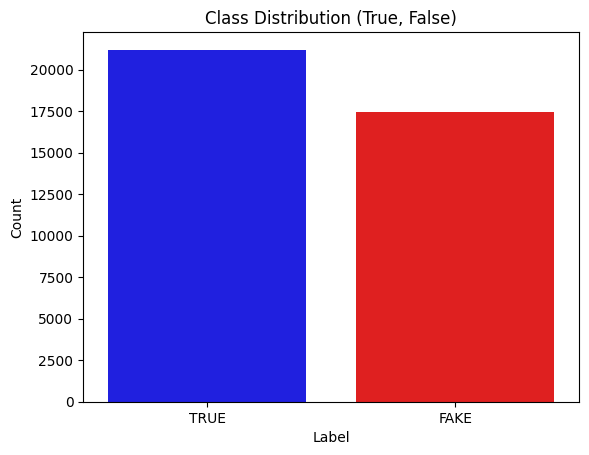

In [58]:
print("Class counts:")
print(merged_no_duplicates_df['label'].value_counts())

print("\nClass percentage:")
print(merged_no_duplicates_df['label'].value_counts(normalize=True) * 100)

sns.countplot(x='label', hue='label', data=merged_no_duplicates_df, legend= False, palette={'TRUE':"blue",'FAKE':"red"})
plt.title("Class Distribution (True, False)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
#Xio: Even after removal of duplicates there is no major class imbalance in the data set that has to be fixed

In [62]:
#merge Koshish's split dfs
merged_no_duplicates_df = pd.concat([df_true_final, df_fake_final], ignore_index=True)
df_final_cleaned = merged_no_duplicates_df

### Feature Extraction: Linguistic Features

In [64]:
import string

#function to extract linguistic features
def extract_linguistic_features(text):
    if isinstance(text, str):
        #number of sentences
        sentences = re.split(r'[.!?]+', text)
        num_sentences = len(sentences) if sentences and sentences[0] != '' else 0

        #number of words
        words = text.split()
        num_words = len(words)

        #average sentence length (in words)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0

        #number of punctuation marks
        num_punctuation = sum([1 for char in text if char in string.punctuation])

        #average word length
        avg_word_length = sum(len(word) for word in words) / num_words if num_words > 0 else 0

        return pd.Series([num_sentences, num_words, avg_sentence_length, num_punctuation, avg_word_length])
    else:
        return pd.Series([0, 0, 0, 0, 0]) # Return 0 for non-string inputs


#apply the function to extract features for 'title' and 'text'
#create new columns for title features
df_final_cleaned[['title_num_sentences', 'title_num_words', 'title_avg_sentence_length', 'title_num_punctuation', 'title_avg_word_length']] = df_final_cleaned['title'].apply(extract_linguistic_features)

#create new columns for text features
df_final_cleaned[['text_num_sentences', 'text_num_words', 'text_avg_sentence_length', 'text_num_punctuation', 'text_avg_word_length']] = df_final_cleaned['text'].apply(extract_linguistic_features)

print("DataFrame shape after adding linguistic features:", df_final_cleaned.shape)
display(df_final_cleaned.head())

DataFrame shape after adding linguistic features: (38635, 15)


,title,text,subject,date,label,title_num_sentences,title_num_words,title_avg_sentence_length,title_num_punctuation,title_avg_word_length,text_num_sentences,text_num_words,text_avg_sentence_length,text_num_punctuation,text_avg_word_length
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",TRUE,3.0,10.0,3.333333,3.0,5.500000,44.0,746.0,16.954545,115.0,5.210456
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",TRUE,3.0,9.0,3.000000,3.0,6.222222,38.0,621.0,16.342105,74.0,5.528180
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",TRUE,4.0,10.0,2.500000,6.0,5.100000,23.0,454.0,19.739130,44.0,5.074890
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",TRUE,1.0,9.0,9.000000,2.0,5.666667,22.0,372.0,16.909091,48.0,5.532258
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",TRUE,1.0,11.0,11.000000,2.0,5.363636,61.0,849.0,13.918033,132.0,5.080094


### Feature Analysis: Visualizing Linguistic Features

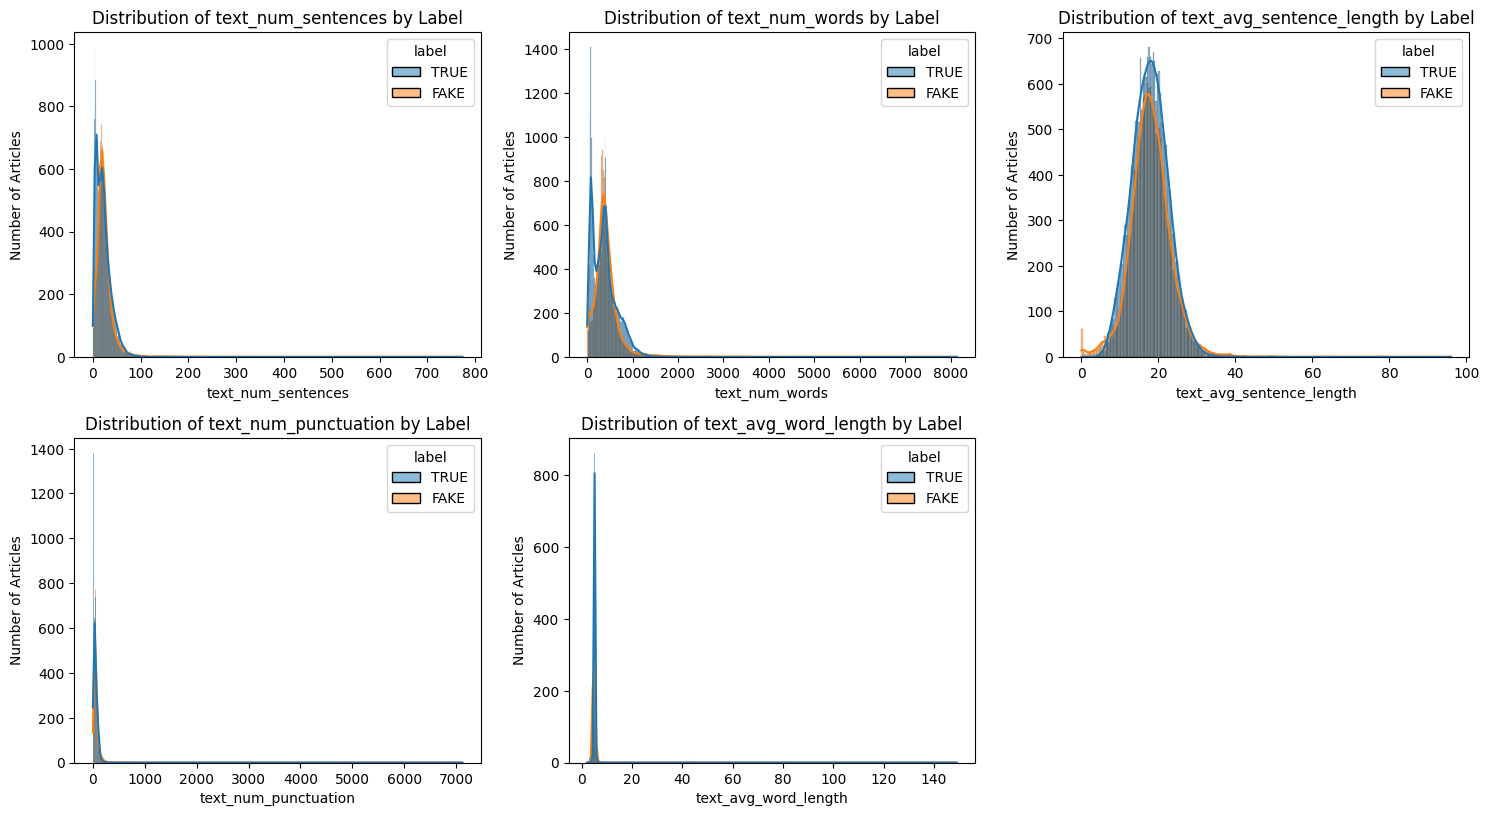

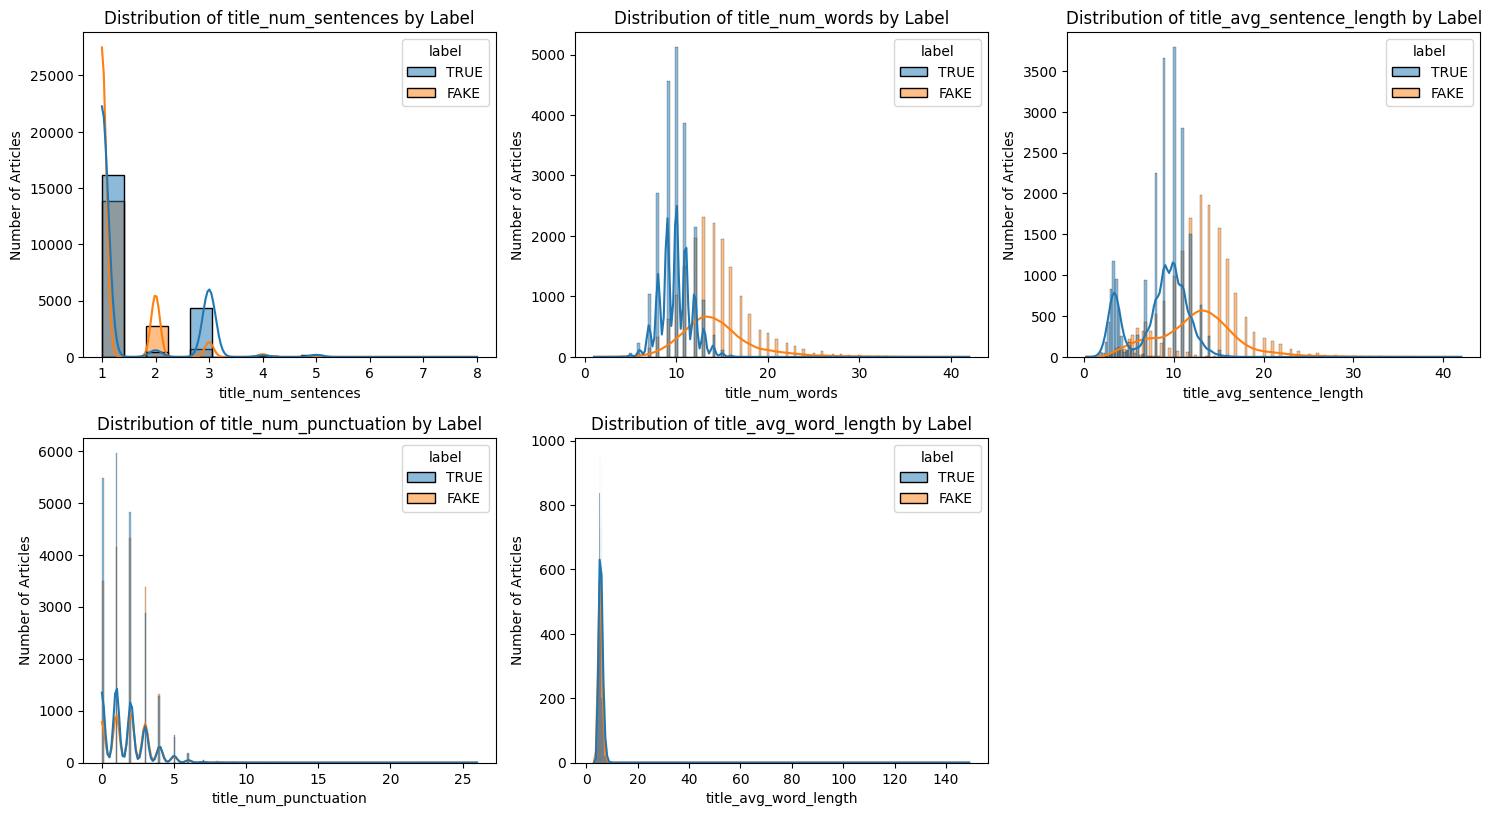

In [65]:
#visualize distributions of linguistic features for 'text'
features_to_visualize = ['text_num_sentences', 'text_num_words', 'text_avg_sentence_length',
                         'text_num_punctuation', 'text_avg_word_length',
                         'text_num_exclamation_points', 'text_num_question_marks', 'text_num_quotes',
                         'text_num_all_caps_words', 'text_percentage_capitalized_words', 'text_flesch_reading_ease',
                         'text_dale_chall_readability_score', 'text_avg_sentence_length_chars']

#filter features_to_visualize to only include columns present in df_final_cleaned
available_text_features = [feature for feature in features_to_visualize if feature in df_final_cleaned.columns]

plt.figure(figsize=(15, 20)) #figure height to accommodate more plots

for i, feature in enumerate(available_text_features):
    plt.subplot(5, 3, i + 1) #subplot grid 5x3
    sns.histplot(data=df_final_cleaned, x=feature, hue='label', kde=True, palette='tab10')
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

#visualize features for 'title'
features_to_visualize_title = ['title_num_sentences', 'title_num_words', 'title_avg_sentence_length',
                               'title_num_punctuation', 'title_avg_word_length',
                               'title_num_exclamation_points', 'title_num_question_marks', 'title_num_quotes',
                               'title_num_all_caps_words', 'title_percentage_capitalized_words', 'title_flesch_reading_ease',
                               'title_dale_chall_readability_score', 'title_avg_sentence_length_chars']

#filter features_to_visualize_title to only include columns present in df_final_cleaned
available_title_features = [feature for feature in features_to_visualize_title if feature in df_final_cleaned.columns]


plt.figure(figsize=(15, 20)) #figure height

for i, feature in enumerate(available_title_features):
    plt.subplot(5, 3, i + 1) #subplot grid 5x3
    sns.histplot(data=df_final_cleaned, x=feature, hue='label', kde=True, palette='tab10')
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

### Feature Analysis: Descriptive Statistics

In [66]:
#get descriptive statistics for linguistic features grouped by label
linguistic_features = [
    'title_num_sentences', 'title_num_words', 'title_avg_sentence_length', 'title_num_punctuation', 'title_avg_word_length',
    'text_num_sentences', 'text_num_words', 'text_avg_sentence_length', 'text_num_punctuation', 'text_avg_word_length'
]

descriptive_stats = df_final_cleaned.groupby('label')[linguistic_features].describe()

print("Descriptive statistics of linguistic features by label (0: Fake, 1: True):")
display(descriptive_stats)

Descriptive statistics of linguistic features by label (0: Fake, 1: True):


title_num_sentences                                               \
                    count      mean       std  min  25%  50%  75%  max   
label                                                                    
FAKE              17444.0  1.264561  0.583853  1.0  1.0  1.0  1.0  8.0   
TRUE              21191.0  1.471049  0.875711  1.0  1.0  1.0  1.0  7.0   

      title_num_words             ... text_num_punctuation          \
                count       mean  ...                  75%     max   
label                             ...                                
FAKE          17444.0  14.316900  ...                 70.0  7119.0   
TRUE          21191.0   9.951206  ...                 65.0   593.0   

      text_avg_word_length                                                    \
                     count      mean       std       min       25%       50%   
label                                                                          
FAKE               17444.0  5.103170  2.776271  2.250000  4.728743  4.929114   
TRUE               21191.0  5.162868  0.262337  3.773224  4.995444  5.157407   

                             
            75%         max  
label                        
FAKE   5.158686  149.000000  
TRUE   5.324324    6.892308  

[2 rows x 80 columns]

#NER Analysis

In [67]:
#Loading small. Overall this cell takes 2-3min to load
nlp = spacy.load("en_core_web_sm")

#Creating a sample size of the entire dataset
df_sample = merged_no_duplicates_df.sample(2000, random_state=42)
texts = df_sample["text"].tolist()

#Using pipelines to process batches of articles faster
docs = list(nlp.pipe(texts, batch_size=100))

#Extracting the person and organizations entities
df_sample["persons"] = [[ent.text for ent in doc.ents if ent.label_=="PERSON"] for doc in docs]
df_sample["orgs"] = [[ent.text for ent in doc.ents if ent.label_=="ORG"] for doc in docs]

#Creating lists of just the person and organizations that appear in each fake and true article
fake_persons = [p for persons in df_sample[df_sample["label"]=='FAKE']["persons"] for p in persons]
true_persons = [p for persons in df_sample[df_sample["label"]=='TRUE']["persons"] for p in persons]
fake_orgs = [o for orgs in df_sample[df_sample["label"]=='FAKE']["orgs"] for o in orgs]
true_orgs = [o for orgs in df_sample[df_sample["label"]=='TRUE']["orgs"] for o in orgs]

#Getting and Counting the top entities
fake_counts = Counter(fake_persons).most_common(10)
true_counts = Counter(true_persons).most_common(10)
fake_org_counts = Counter(fake_orgs).most_common(10)
true_org_counts = Counter(true_orgs).most_common(10)

print("Fake News Top PERSONs:", fake_counts)
print("True News Top PERSONs:", true_counts)
print("Fake News Top ORGs:", fake_org_counts)
print("True News Top ORGs:", true_org_counts)

Fake News Top PERSONs: [('Trump', 1006), ('Donald Trump', 547), ('Obama', 496), ('Clinton', 284), ('Hillary Clinton', 263), ('Hillary', 205), ('doesn', 130), ('Twitter', 116), ('Donald J. Trump', 78), ('Barack Obama', 72)]
True News Top PERSONs: [('Trump', 669), ('Donald Trump', 440), ('Clinton', 337), ('Obama', 273), ('Barack Obama', 162), ('Hillary Clinton', 93), ('Twitter', 91), ('Comey', 73), ('Putin', 71), ('Tillerson', 55)]
Fake News Top ORGs: [('Trump', 1341), ('GOP', 209), ('CNN', 176), ('FBI', 173), ('Senate', 136), ('Congress', 122), ('the White House', 109), ('Fox News', 109), ('White House', 91), ('House', 87)]
True News Top ORGs: [('Trump', 1230), ('Senate', 350), ('Congress', 239), ('EU', 195), ('White House', 169), ('the White House', 167), ('House', 146), ('U.N.', 113), ('State', 80), ('FBI', 77)]


NER Visualization

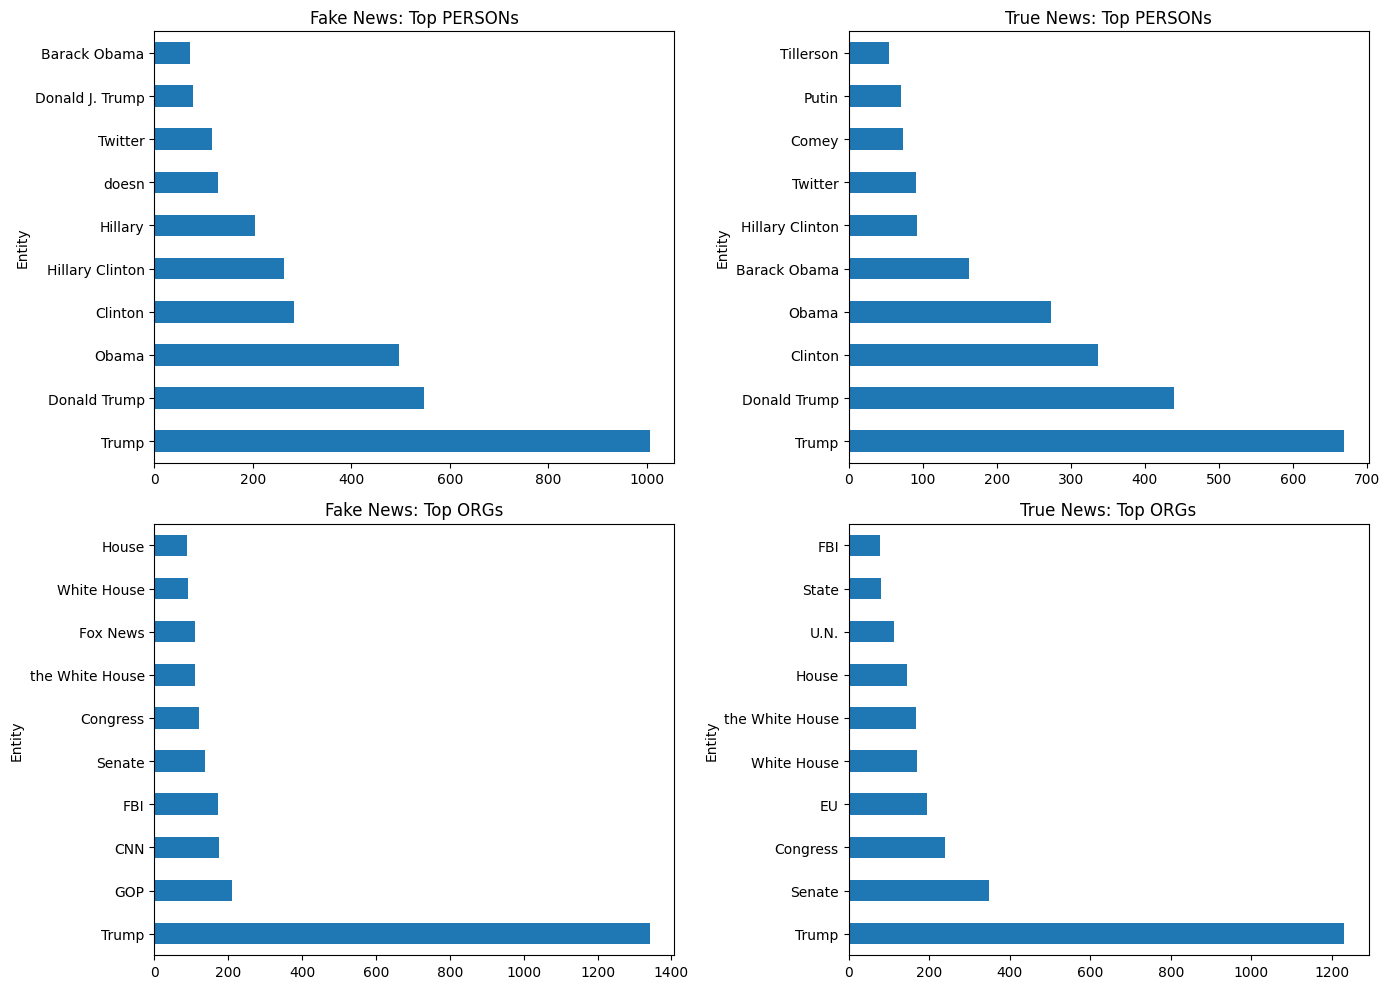

In [68]:
#Converting from lists to DF
fake_person_df = pd.DataFrame(fake_counts, columns=["Entity", "Count"])
true_person_df = pd.DataFrame(true_counts, columns=["Entity", "Count"])
fake_org_df = pd.DataFrame(fake_org_counts, columns=["Entity", "Count"])
true_org_df = pd.DataFrame(true_org_counts, columns=["Entity", "Count"])

#Creating bar charts
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fake_person_df.plot(kind="barh", x="Entity", y="Count", ax=axes[0,0], title="Fake News: Top PERSONs", legend=False)
true_person_df.plot(kind="barh", x="Entity", y="Count", ax=axes[0,1], title="True News: Top PERSONs", legend=False)
fake_org_df.plot(kind="barh", x="Entity", y="Count", ax=axes[1,0], title="Fake News: Top ORGs", legend=False)
true_org_df.plot(kind="barh", x="Entity", y="Count", ax=axes[1,1], title="True News: Top ORGs", legend=False)

plt.tight_layout()
plt.show()
#Shows that an organization feature is really important in telling the difference between fake and true as the entities and the frequency
#of this entites are different but with the people entity both fake and true articles contain similar entities and similar counts.
#Next steps: Now that article have numeric fetures on entity we can do TF-IDF and then combine that with these features to create our matrix

# Emotional Words EDA

Sentiment Analysis Setup

In [69]:
# Install and import required libraries
!pip install textblob
from textblob import TextBlob

# Download required NLTK data
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Create Emotional Features

In [70]:
# The SentimentIntensityAnalyzer in NLTK is a powerful tool for performing sentiment analysis,
# specifically utilizing the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon and rule-based sentiment analysis model.

# Initialize sentiment analyzers
sia = SentimentIntensityAnalyzer()

def analysis_emotions(text):
  vader_score = sia.polarity_scores(text)
  blob = TextBlob(text)

  return{
      'vader_compound': vader_score['compound'],            # A standardized score combining all emotions
      'vader_positive': vader_score['pos'],                 # the percentage of positive sentiment words in the text
      'vader_negative': vader_score['neg'],                 # the percentage of negative sentiment words in the text
      'vader_neutral': vader_score['neu'],                  # the percentage of neutral words in the text
      'textblob_polarity': blob.sentiment.polarity,         # shows if the text is positive, negative or neutral
      'textblob_subjectivity': blob.sentiment.subjectivity  # shows whether the text is more opinion-based or factual
  }

Apply to Data Set

In [71]:
# Create emotional features for clean dataset
emotion_feature = []

for text in merged_no_duplicates_df['text']:
  emotion_feature.append(analysis_emotions(text))

emotion_df = pd.DataFrame(emotion_feature)
emotion_analysis_df = pd.concat([merged_no_duplicates_df.reset_index(drop=True), emotion_df],axis=1)

Emotional Words Exploratory Analysis

In [72]:
# # Compare emotional patterns between real and fake news
print("Emotion analysis: ")
for feature in ['vader_compound', 'vader_positive', 'vader_negative','vader_neutral', 'textblob_polarity', 'textblob_subjectivity']:
  print(f"\n{feature}: ")
  print(f"True news mean: {emotion_analysis_df[emotion_analysis_df['label'] == 'TRUE'][feature].mean():.2f}")
  print(f"Fake news mean: {emotion_analysis_df[emotion_analysis_df['label'] == 'FAKE'][feature].mean():.2f}")

Emotion analysis: 

vader_compound: 
True news mean: 0.06
Fake news mean: -0.09

vader_positive: 
True news mean: 0.08
Fake news mean: 0.09

vader_negative: 
True news mean: 0.08
Fake news mean: 0.10

vader_neutral: 
True news mean: 0.84
Fake news mean: 0.81

textblob_polarity: 
True news mean: 0.05
Fake news mean: 0.06

textblob_subjectivity: 
True news mean: 0.36
Fake news mean: 0.45


Emotion words correlation analysis (Need improved)

In [73]:
# Label True News as 1, Fake news as 0
emotion_analysis_df['label_num'] = (emotion_analysis_df['label'] == 'TRUE').astype(int)

correlation = {}
emotion_feature = ['vader_compound', 'vader_positive', 'vader_negative', 'vader_neutral', 'textblob_polarity', 'textblob_subjectivity']

# Calculate the correlation of each feature
for feature in emotion_feature:
  corr = emotion_analysis_df[feature].corr(emotion_analysis_df['label_num'])
  correlation[feature] = corr
  print(f"{feature}: {corr:.2f}")

# get the list of features that has a correlation > 0.3
strong_features = {feature: corr for feature, corr in correlation.items() if abs(corr) > 0.3}
print(f"Strong correlation features(> 0.3 ): {strong_features}")

vader_compound: 0.09
vader_positive: -0.12
vader_negative: -0.19
vader_neutral: 0.25
textblob_polarity: -0.04
textblob_subjectivity: -0.36
Strong correlation features(> 0.3 ): {'textblob_subjectivity': np.float64(-0.36294522674795826)}


Visual Analysis

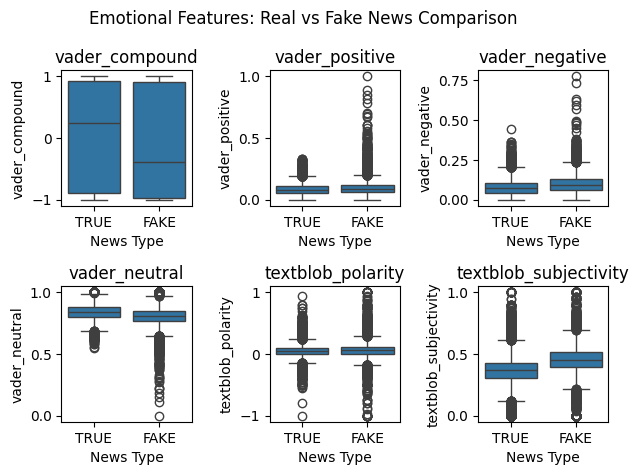

In [74]:
# Set up the subplot grid, creates a 2x3 (6 features in total) grid of plots
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.suptitle('Emotional Features: Real vs Fake News Comparison')

# Create individual plots
features_plot = emotion_feature
for i, feature in enumerate(features_plot):
  row = i // 3    # Set rows
  col = i % 3     # Set cols

  # Create boxplot each feature
  sns.boxplot(data=emotion_analysis_df, x ='label', y=feature, ax=axes[row,col])
  axes[row,col].set_title(f'{feature}')
  axes[row,col].set_xlabel('News Type')

plt.tight_layout()
plt.show()

# Siying Sumary:
# There are 2 feature that we can kind of explore about
# 1. Fake news tends to be more negative, but True news tend to be more in a positive tone.
# This emotional EDA turn out to be that instead of being more "emotional", fake news tend to be more "subjective".
# Real news tends to report facts objectively, while fake news contains more opinions and speculations.

# Source Attribution EDA - Focus on Named Entity Recognition (NER)

Source Attribution Data exploration and Basic NER Analysis

In [75]:
# install default trained pipeline package for English & large model
nlp = spacy.load("en_core_web_sm")

def extract_source_attribution_features(text):
  doc = nlp(text)

  # Named entity for sources
  entities = {
      'PERSON': [],       # Individual source
      'ORG': [],          # Organizational sources
      'GPE': []           # Government/political entities
  }

  for ent in doc.ents:
    if ent.label_ in entities:
      entities[ent.label_].append(ent.text)

  # Attribution patterns using dependency parsing
  attribution_patterns = {
        'according_to': 0,
        'said_patterns': 0,
        'reported_patterns': 0,
        'official_statements': 0
  }

  for token in doc:

    # Detect Arrcoring-to pattern
    if token.lemma_ == "according":
        # Look for "to" in the next few tokens
        for i in range(1, min(4, len(doc) - token.i)):
            if doc[token.i + i].lemma_ == "to":
                attribution_patterns['according_to'] += 1
                break

    # Detect speech pattern
    if token.lemma_ in ["say", "state", "announce"] and token.pos_ == "VERB":
      attribution_patterns['said_patterns'] += 1

    # Detect report pattern
    if token.lemma_ in ["report","indicate", "show"] and token.pos_ == "VERB":
      attribution_patterns['reported_patterns'] += 1

    # Official language
    if token.text.lower() in ["official", "statement", "spokesperson"]:
      attribution_patterns['official_statements'] += 1

  return {
      'person_count': len(entities['PERSON']),
      'org_count': len(entities['ORG']),
      'gpe_count': len(entities['GPE']),
      'total_named_sources':len(entities['PERSON'] + entities['ORG']),
      'according_to_count': attribution_patterns['according_to'],
      'said_patterns': attribution_patterns['said_patterns'],
      'reported_patterns': attribution_patterns['reported_patterns'],
      'official_statements': attribution_patterns['official_statements'],
      'named_entities': entities
  }

 Apply to Dataset

In [76]:
spacy_features_list = []

for text in merged_no_duplicates_df['text']:
  features = extract_source_attribution_features(text)
  spacy_features_list.append(features)

# Convert to dataframe
spacy_df = pd.DataFrame(spacy_features_list)

# Add to merged dataset
source_attribution_df = pd.concat([merged_no_duplicates_df.reset_index(drop=True), spacy_df],axis = 1)

EDA Analysis and Comparison

In [77]:
# Compare SpaCy features between real and fake news
feature_cols = ['person_count', 'org_count', 'gpe_count','total_named_sources',
                'according_to_count', 'said_patterns', 'reported_patterns', 'official_statements']

print("SpaCy Source Attribution Analysis:")
for feature in feature_cols:
    real_mean = source_attribution_df[source_attribution_df['label'] == 'TRUE'][feature].mean()
    fake_mean = source_attribution_df[source_attribution_df['label'] == 'FAKE'][feature].mean()

    print(f"{feature}:")
    print(f"  Real news mean: {real_mean:.3f}")
    print(f"  Fake news mean: {fake_mean:.3f}")
    print(f"  Difference: {real_mean - fake_mean:.3f}")
    print()

SpaCy Source Attribution Analysis:
person_count:
  Real news mean: 8.871
  Fake news mean: 12.248
  Difference: -3.377

org_count:
  Real news mean: 9.498
  Fake news mean: 9.483
  Difference: 0.014

gpe_count:
  Real news mean: 10.046
  Fake news mean: 4.932
  Difference: 5.114

total_named_sources:
  Real news mean: 18.368
  Fake news mean: 21.731
  Difference: -3.363

according_to_count:
  Real news mean: 0.000
  Fake news mean: 0.000
  Difference: 0.000

said_patterns:
  Real news mean: 5.486
  Fake news mean: 2.543
  Difference: 2.943

reported_patterns:
  Real news mean: 0.481
  Fake news mean: 0.614
  Difference: -0.133

official_statements:
  Real news mean: 0.646
  Fake news mean: 0.295
  Difference: 0.351



Visualization

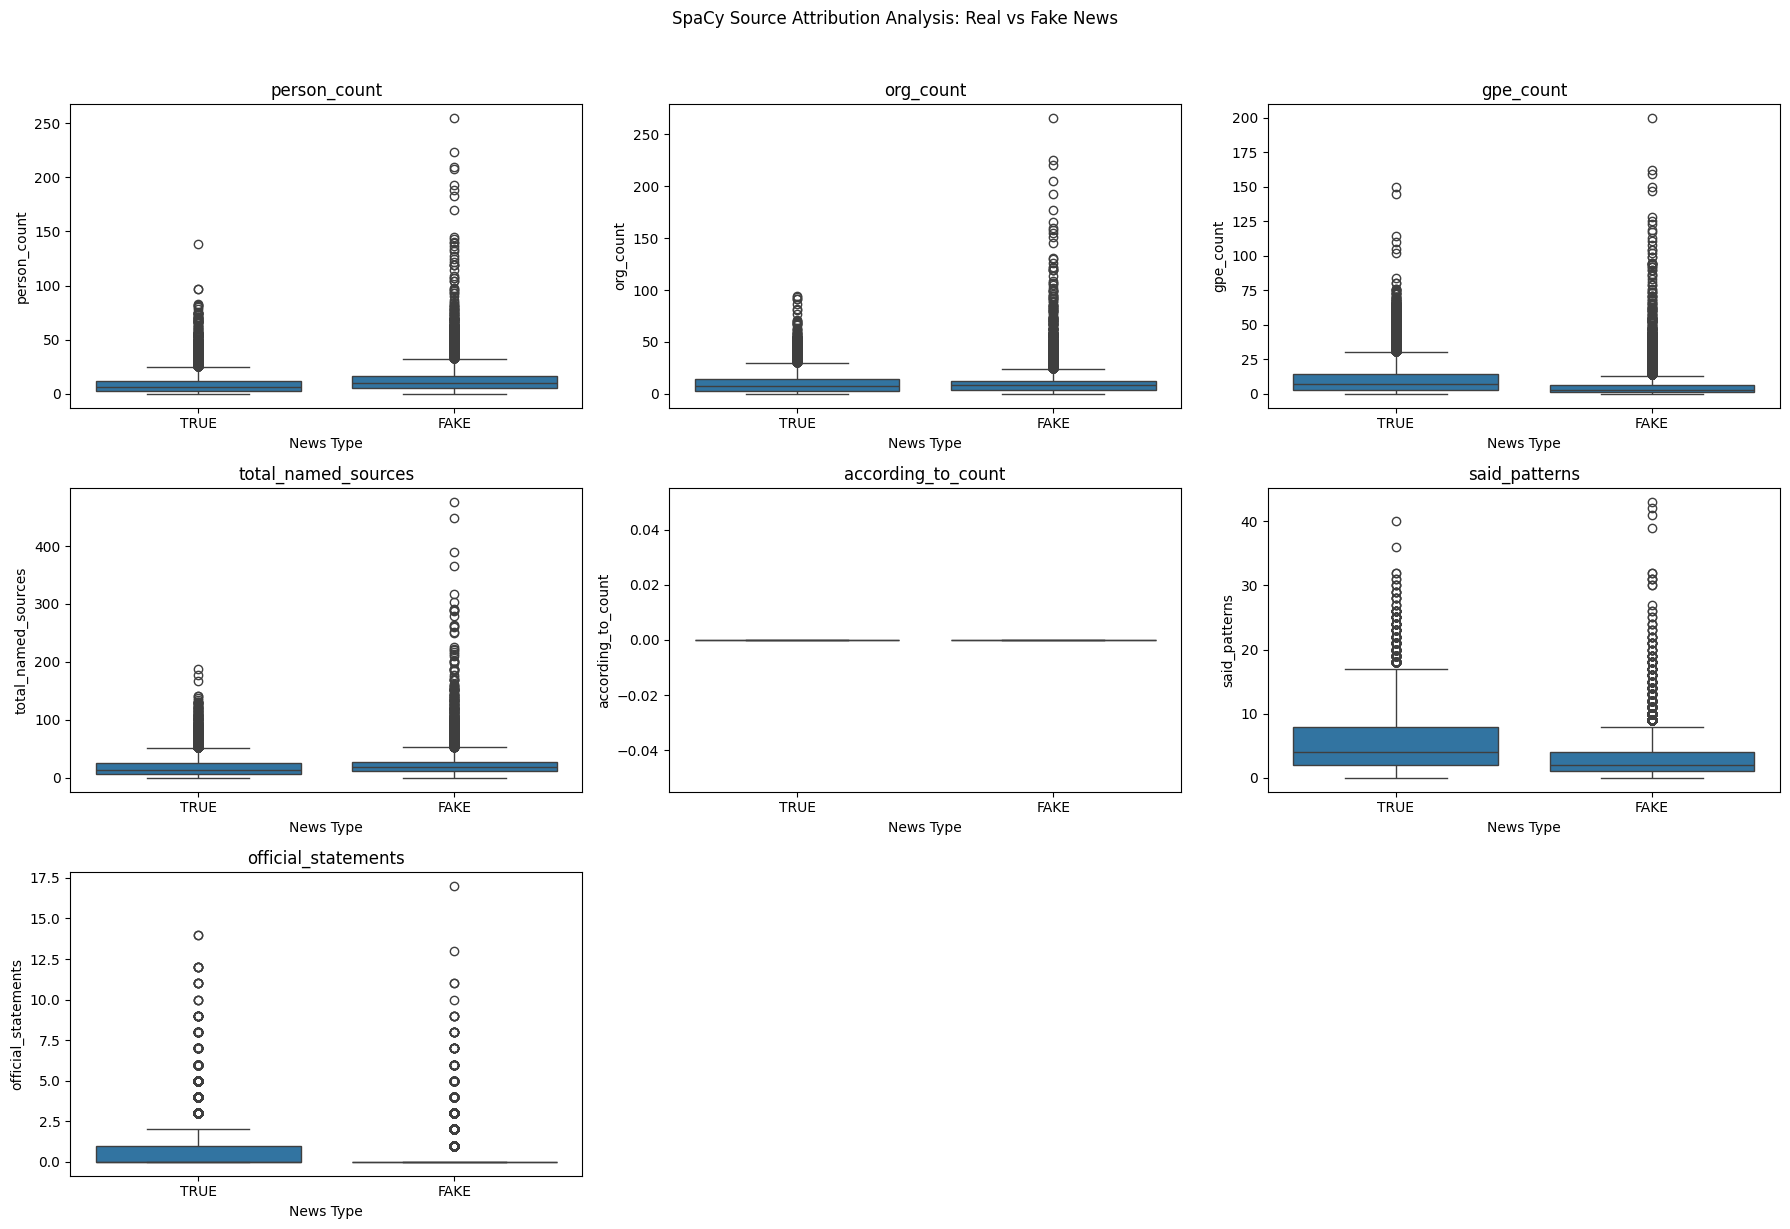

In [79]:
# Create visualizations for SpaCy features

features_to_plot = [
    'person_count', 'org_count', 'gpe_count', 'total_named_sources',
    'according_to_count', 'said_patterns', 'official_statements'
]

n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols  # Calculate rows (up-rounded)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.suptitle('SpaCy Source Attribution Analysis: Real vs Fake News', y=1.02)

for i, feature in enumerate(features_to_plot):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data=source_attribution_df, x='label', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('News Type')

# Remove any unused axes so empty plots don't show
for j in range(len(features_to_plot), n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()


# Social Media Citation EDA

Social Media Ciatation Data Exploration

In [80]:
import re
import nltk
from textblob import TextBlob
from collections import Counter
nltk.download('punkt_tab')

# Define social media related keywords
SOCIAL_MEDIA_KEYWORDS = {
    'platforms': ['twitter', 'facebook', 'instagram', 'youtube', 'tiktok', 'reddit',
                  'linkedin', 'whatsapp', 'telegram', 'snapchat'],
    'actions': ['tweet', 'retweet', 'like', 'share', 'follow', 'post', 'status',
                'update', 'comment', 'message', 'dm', 'direct message', 'story'],
    'elements': ['hashtag', 'mention', 'handle', 'feed', 'timeline', 'viral',
                 'trending', 'influencer', 'follower', 'subscriber']
}

def analyze_social_media_presence(text):
    if pd.isna(text) or text == '':
        return {
            'social_media_count': 0,
            'platform_mentions': 0,
            'social_actions': 0,
            'social_elements': 0,
            'hashtags': 0,
            'mentions': 0,
        }

    blob = TextBlob(str(text))
    text_lower = text.lower()

    # Basic regex patterns
    hashtags = re.findall(r'#\w+', text)
    mentions = re.findall(r'@\w+', text)

    # Count social media related terms
    platform_mentions = sum(1 for platform in SOCIAL_MEDIA_KEYWORDS['platforms']
                           if platform in text_lower)
    social_actions = sum(1 for action in SOCIAL_MEDIA_KEYWORDS['actions']
                        if action in text_lower)
    social_elements = sum(1 for element in SOCIAL_MEDIA_KEYWORDS['elements']
                         if element in text_lower)

    # Find specific keywords present
    found_keywords = []
    for category in SOCIAL_MEDIA_KEYWORDS.values():
        for keyword in category:
            if keyword in text_lower:
                found_keywords.append(keyword)

    return {
        'social_media_count': platform_mentions + social_actions + social_elements,
        'platform_mentions': platform_mentions,
        'social_actions': social_actions,
        'social_elements': social_elements,
        'hashtags': len(hashtags),
        'mentions': len(mentions),
        'social_keywords_found': found_keywords
    }


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Apply to Dataset

In [81]:
# Apply your function to the dataset
print("Analyzing social media citations with TextBlob...")
social_media_results = []

for text in merged_no_duplicates_df['text']:
    result = analyze_social_media_presence(text)
    social_media_results.append(result)

# Convert to DataFrame
social_media_df = pd.DataFrame(social_media_results)

# Add labels
social_media_df['label'] = merged_no_duplicates_df['label'].values

# Display results
textblob_features = ['social_media_count', 'platform_mentions', 'social_actions',
                     'social_elements', 'hashtags', 'mentions']

print("TextBlob Social Media Analysis Results:")
for feature in textblob_features:
    real_mean = social_media_df[social_media_df['label'] == 'TRUE'][feature].mean()
    fake_mean = social_media_df[social_media_df['label'] == 'FAKE'][feature].mean()

    print(f"{feature}:")
    print(f"  Real news: {real_mean:.3f}")
    print(f"  Fake news: {fake_mean:.3f}")
    print(f"  Difference: {fake_mean - real_mean:.3f}")
    print()

Analyzing social media citations with TextBlob...
TextBlob Social Media Analysis Results:
social_media_count:
  Real news: 1.627
  Fake news: 2.535
  Difference: 0.908

platform_mentions:
  Real news: 0.116
  Fake news: 0.424
  Difference: 0.308

social_actions:
  Real news: 1.420
  Fake news: 1.926
  Difference: 0.506

social_elements:
  Real news: 0.091
  Fake news: 0.185
  Difference: 0.094

hashtags:
  Real news: 0.020
  Fake news: 0.351
  Difference: 0.331

mentions:
  Real news: 0.038
  Fake news: 1.377
  Difference: 1.339



Visualization

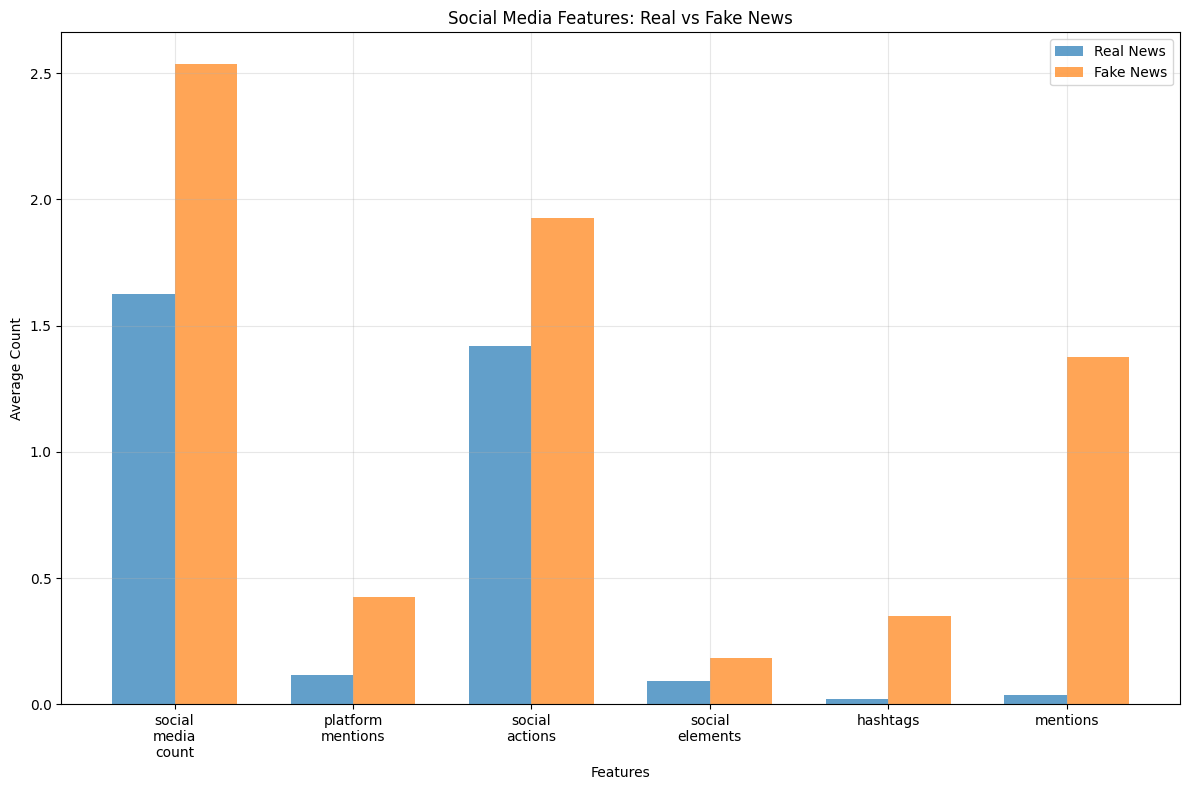

In [82]:
# Simple visualization for TextBlob results
plt.figure(figsize=(12, 8))

textblob_features = ['social_media_count', 'platform_mentions', 'social_actions',
                     'social_elements', 'hashtags', 'mentions']

# Calculate means
real_means = []
fake_means = []
for feature in textblob_features:
    real_means.append(social_media_df[social_media_df['label'] == 'TRUE'][feature].mean())
    fake_means.append(social_media_df[social_media_df['label'] == 'FAKE'][feature].mean())

# Bar chart
x = range(len(textblob_features))
width = 0.35

plt.bar(x, real_means, width, label='Real News', alpha=0.7)
plt.bar([i + width for i in x], fake_means, width, label='Fake News', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Average Count')
plt.title('Social Media Features: Real vs Fake News')
plt.xticks([i + width/2 for i in x], [f.replace('_', '\n') for f in textblob_features])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Casing/Stopwords EDA

In [83]:
nltk.download('stopwords')
# Import NLTK's stopwords list
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Print the list in a sorted order for readability
print("Number of stopwords in NLTK's English list:", len(stop_words))
print("\nFull list of English stopwords from NLTK:")
print(sorted(stop_words))

Number of stopwords in NLTK's English list: 198

Full list of English stopwords from NLTK:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This shows the amount of words in each text that have 2 or more consecutive capital letters and also the ratio of stopwords in each of the texts.

In [84]:
# 1. Define a function to count uppercase words
def count_uppercase(text):
    # Finds all words with 2 or more consecutive capital letters
    return len(re.findall(r'\b[A-Z]{2,}\b', str(text)))

# 2. Define a function to calculate stopword ratio
def get_stopword_ratio(text):
    words = str(text).split()
    if len(words) == 0:
        return 0
    stopwords_in_text = [word for word in words if word.lower() in stop_words]
    return len(stopwords_in_text) / len(words)

# 3. Apply the functions to create new columns
df_final_cleaned['uppercase_count'] = df_final_cleaned['text'].apply(count_uppercase)
df_final_cleaned['stopword_ratio'] = df_final_cleaned['text'].apply(get_stopword_ratio)

df_final_cleaned[['text', 'uppercase_count', 'stopword_ratio', 'label']].head(10)

,text,uppercase_count,stopword_ratio,label
0,The head of a conservative Republican faction ...,5,0.378016,TRUE
1,Transgender people will be allowed for the fir...,3,0.375201,TRUE
2,The special counsel investigation of links bet...,4,0.405286,TRUE
3,Trump campaign adviser George Papadopoulos tol...,2,0.381720,TRUE
4,President Donald Trump called on the U.S. Post...,10,0.393404,TRUE
5,The White House said on Friday it was set to k...,7,0.367622,TRUE
6,President Donald Trump said on Thursday he bel...,2,0.402256,TRUE
7,The following statements were posted to the ve...,5,0.358209,TRUE
8,The following statements were posted to the ve...,11,0.353535,TRUE
9,Alabama Secretary of State John Merrill said h...,1,0.375000,TRUE


/tmp/ipython-input-1717307458.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Fake', 'Real'])
/tmp/ipython-input-1717307458.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Fake', 'Real'])


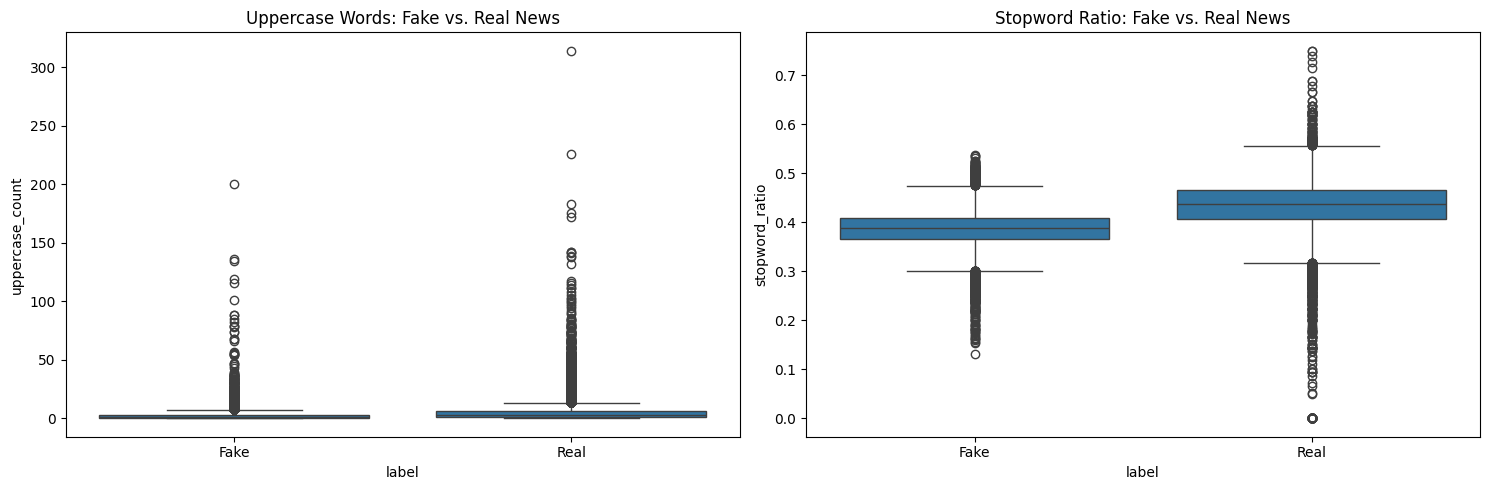

Average uppercase_count for Fake news: 5.628812199036918
Average uppercase_count for Real news: 2.503657212967769

Average stopword_ratio for Fake news: 0.432513249092029
Average stopword_ratio for Real news: 0.3861156076825964


In [85]:
# 1. Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 2. Plot Uppercase Count
sns.boxplot(x='label', y='uppercase_count', data=df_final_cleaned, ax=axes[0])
axes[0].set_title('Uppercase Words: Fake vs. Real News')
axes[0].set_xticklabels(['Fake', 'Real'])

# 3. Plot Stopword Ratio
sns.boxplot(x='label', y='stopword_ratio', data=df_final_cleaned, ax=axes[1])
axes[1].set_title('Stopword Ratio: Fake vs. Real News')
axes[1].set_xticklabels(['Fake', 'Real'])
plt.tight_layout()
plt.show()


print("Average uppercase_count for Fake news:", df_final_cleaned[df_final_cleaned['label']=='FAKE']['uppercase_count'].mean())
print("Average uppercase_count for Real news:", df_final_cleaned[df_final_cleaned['label']=='TRUE']['uppercase_count'].mean())
print("\nAverage stopword_ratio for Fake news:", df_final_cleaned[df_final_cleaned['label']=='FAKE']['stopword_ratio'].mean())
print("Average stopword_ratio for Real news:", df_final_cleaned[df_final_cleaned['label']=='TRUE']['stopword_ratio'].mean())

In [86]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    """
    Clean text by converting to lowercase and removing stopwords
    """
    # Convert to string and lowercase
    text = str(text).lower()

    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Apply cleaning
df_final_cleaned['text_cleaned'] = df_final_cleaned['text'].apply(clean_text)

In [87]:
# Compare before and after cleaning
print("Original text sample:")
print(df_final_cleaned['text'].iloc[0])
print("\nCleaned text sample:")
print(df_final_cleaned['text_cleaned'].iloc[0])
print(f"\nOriginal length: {len(df_final_cleaned['text'].iloc[0].split())} words")
print(f"Cleaned length: {len(df_final_cleaned['text_cleaned'].iloc[0].split())} words")

Original text sample:
The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educatio

For Feature Engineering don't run just yet.

In [88]:
# Recalculate features on cleaned text
df_final_cleaned['uppercase_count_cleaned'] = df_final_cleaned['text_cleaned'].apply(count_uppercase)
df_final_cleaned['stopword_ratio_cleaned'] = df_final_cleaned['text_cleaned'].apply(get_stopword_ratio)

# The stopword ratio should now be very low since we removed stopwords
print("Stopword ratio after cleaning:")
print(df_final_cleaned['stopword_ratio_cleaned'].describe())

# Keep original text and add cleaned version
df_final_cleaned['text_original'] = df_final_cleaned['text']  # backup original
df_final_cleaned['text'] = df_final_cleaned['text'].apply(clean_text)  # replace with cleaned

# Now your existing code will work with cleaned text
df_final_cleaned['uppercase_count'] = df_final_cleaned['text'].apply(count_uppercase)
df_final_cleaned['stopword_ratio'] = df_final_cleaned['text'].apply(get_stopword_ratio)

Stopword ratio after cleaning:
count    38635.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: stopword_ratio_cleaned, dtype: float64
